# Лабораторная работа 1, ПМИ 2024/25, I курс, M+, дискретная математика.

Это небольшой ознакомительный туториал по библиотеке [NetworkX](https://networkx.org). Каждая задача оценивается в $2.5$ балла, за №3 и №4 можно получить по одному дополнительному. Таким образом, за выполнение этого ноутбука можно получить до $12$ баллов.

При решении задач можно и __нужно__ использовать любую функциональность библиотеки NetworkX. При обосновани корректности алгоритмов __не нужно__ обосновывать корректность работы функций из библиотеки. Однако использование _сторонних_ библиотек, кроме NetworkX и matplotlib, запрещено. Обратите внимание, что стандартная библиотека не является сторонней.

Удачи!

## №0. Играемся с NetworkX ($0$ баллов)

NetworkX — это библиотека для работы с графами и базирующихся на них структурами. У библиотеки есть замечательная документация и оффициальные туториалы на [сайте библиотеки](networkx.org), не забывайте заглядывать в них при выполнении лабораторной работы.

Наш основной подопытный в этом ноутбуке — класс [`Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html), предназначенный для работы с неориентированными графами без кратных ребер. Вершинами графов могут быть любые хешируемые объекты, кроме `None`. С каждой вершиной и ребром также ассоциирован словарь произвольных атрибутов.

In [1]:
# ipytest нужен для запуска тестов прямо в ноутбуке
%pip install networkx ipytest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.1 MB/s eta 0:00:00


In [2]:
pip install matplotlib

In [3]:
# не забываем импортировать библиотеку
import networkx as nx

# для запуска тестов
import pytest
import ipytest
ipytest.autoconfig()

In [4]:
G = nx.Graph()  # создаем пустой граф

G.add_nodes_from(range(10))  # добавляем в граф вершины: числа от 0 до 9
G.add_nodes_from(["odd", "even"])  # добавляем еще две вершины-строки

for int_node in range(10):
    # добавляем ребра, которые хранят какую-то информацию
    G.add_edge(int_node, "odd" if int_node % 2 == 1 else "even", quotient=int_node // 2)

print(G)

# G.nodes — список вершин графа
# обратите внимание, что это не питоновский список, а специальный прокси-объект
# в частности, при обращении к G.nodes ничего не копируется
print(f"{G.nodes = }")

# G.edges — список ребер
# Как и в случае в вершинами, G.nodes — это прокси-объект

# По умолчанию edges представляет только набор ребер
print(f"{G.edges = }")

# Можно указать, чтобы edges еще показывал хранимые в ребрах данные
print(f"{G.edges(data=True) = }")

# Можно попросить только ребра, инцидентные какой-то вершине
print(f"{G.edges(nbunch='odd') = }")

# См. также: Graph.degree, Graph.adj

Graph with 12 nodes and 10 edges
G.nodes = NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'odd', 'even'))
G.edges = EdgeView([(0, 'even'), (1, 'odd'), (2, 'even'), (3, 'odd'), (4, 'even'), (5, 'odd'), (6, 'even'), (7, 'odd'), (8, 'even'), (9, 'odd')])
G.edges(data=True) = EdgeDataView([(0, 'even', {'quotient': 0}), (1, 'odd', {'quotient': 0}), (2, 'even', {'quotient': 1}), (3, 'odd', {'quotient': 1}), (4, 'even', {'quotient': 2}), (5, 'odd', {'quotient': 2}), (6, 'even', {'quotient': 3}), (7, 'odd', {'quotient': 3}), (8, 'even', {'quotient': 4}), (9, 'odd', {'quotient': 4})])
G.edges(nbunch='odd') = EdgeDataView([('odd', 1), ('odd', 3), ('odd', 5), ('odd', 7), ('odd', 9)])


Смотреть на графы в текстовом виде, конечно, не очень удобно. NetworkX предоставляет базовые функции для визуализации графов c matplotlib под капотом. Для продвинутой визуализации существуют отдельные пакеты, например Graphviz, однако в этой лабораторной мы не будем их использовать.

(-1.1260000000000001, 0.32599999999999996, -0.5445, 0.5445)

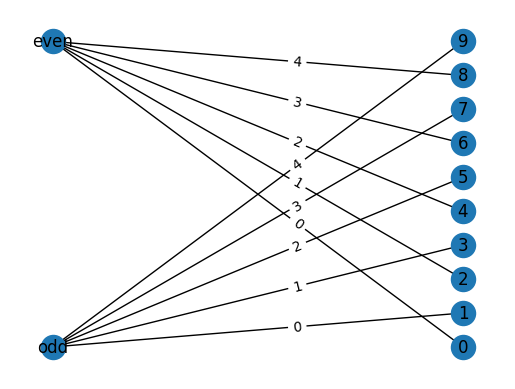

In [5]:
import matplotlib.pyplot as plt
from math import gcd
import numpy as np

# layout задает расположение вершин на картинке
# есть несколько встроенных генераторов layout-ов, но можно и задавать их вручную
layout = nx.bipartite_layout(G, ["odd", "even"])

# рисуем граф в соответствии с заданным layout-ом
# по умолчанию draw_networkx отображает вершины и ребра без данных
nx.draw_networkx(G, layout)

# отдельный метод отображает данные в ребрах
# обратите внимание, что layout должен быть один и тот же: иначе всё поедет
nx.draw_networkx_edge_labels(G, pos=layout, label_pos=0.4,
                             edge_labels=nx.get_edge_attributes(G, "quotient"))

plt.axis("off")

## №1. Выращивание деревьев ($2.5$ балла)

Итак, каждый уважающий себя студент ПМИ должен посадить дерево. Как вы помните, деревом называется связный простой граф без циклов.

Научимся генерировать деревья. Воспользуемся следующей идеей: сгенерируем список `degrees` степеней вершин, а по нему построим дерево.

*Задание*: напишите функцию `generate_tree`, которая принимает на вход массив `degrees` (который можно менять), и возвращает `nx.Graph` — дерево в вершинами `0`, `1`, ..., `len(degrees) - 1`, где степень вершины `i` равна `degrees[i]`, либо `None`, если дерева с таким набором степеней не существует. Обоснуйте корректность алгоритма.

In [6]:
def generate_tree(degrees: list[int]) -> nx.Graph | None:
    # Создаем пары (индекс, значение)
    indexed_array = list(enumerate(degrees))
    sorted_indexed_array = sorted(indexed_array, key=lambda x: x[1], reverse=True)
    sorted_indices = [pair[0] for pair in sorted_indexed_array]

    G = nx.Graph()
    G.add_node(sorted_indices[0])

    if (sum(degrees) / 2 != len(degrees) - 1):
        return None

    u = 1
    for v in sorted_indices:
        cnt_need_neigbors = degrees[v] - (0 if v == sorted_indices[0] else 1)
        for _ in range(cnt_need_neigbors):
            G.add_node(sorted_indices[u])
            G.add_edge(v, sorted_indices[u])

            if (G.degree(sorted_indices[u]) > degrees[sorted_indices[u]]):
                return None

            u += 1

    return G if nx.is_tree(G) and dict(enumerate(degrees)) == dict(G.degree) else None

Graph with 13 nodes and 12 edges
G.nodes = NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 10, 11, 12))
G.edges = EdgeView([(1, 2), (1, 3), (1, 0), (1, 4), (2, 5), (2, 6), (2, 7), (3, 8), (3, 9), (3, 10), (0, 11), (0, 12)])


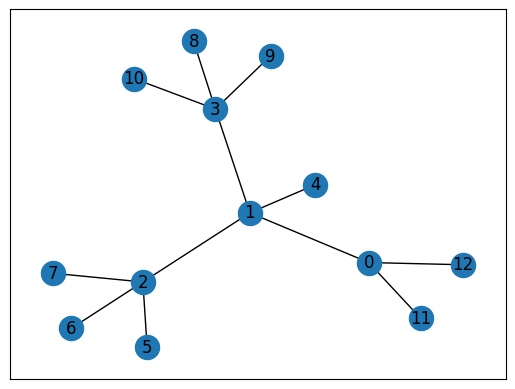

In [7]:
d = [3, 4, 4, 4] + [1] * 9
#d = [2, 0, 2]
G = generate_tree(d)
if (G is not None):
    print(G)
    print(f"{G.nodes = }")
    print(f"{G.edges = }")
    layout = nx.spring_layout(G)
    nx.draw_networkx(G, layout)

In [ ]:
%%ipytest

@pytest.mark.parametrize(
    "degrees",
    [[0], [3, 4, 4, 4] + [1] * 9, [4, 2, 3] + [1] * 5]
)
def test_generate_tree(degrees: list[int]):
    tree = generate_tree(degrees.copy())
    assert tree is not None
    assert dict(tree.degree) == dict(enumerate(degrees))


def test_no_tree():
    assert generate_tree([1, 1, 1]) is None
    assert generate_tree([0, 1, 1]) is None
    assert generate_tree([2, 0, 2]) is None

....                                                                                         [100%]
4 passed in 0.04s


### *Обоснование корректности алгоритма*:

Алгоритм построен на жадной идее:
- Давайте отсортуем вершины по невозрастанию степеней
- Подвесим за любую вершину и будем проводить ребра в любой лист

### Почему это работает:
Заметим, что выбирая свободный лист, мы создаем как минимум еще один лист, при этом подравнивая степень текущей вершины так как нам надо

Таким образом, если дерево действительно существует, то мы его построем.

Осталось заметить, что если на вход подается не дерево, то мы
1) Создадим цикл
2) Недостаточно ребер
3) Степень какой-либо вершины не совпадает с конечной(граф не связен)

Все эти случаи проверяются алгоритмом

Теперь, используя написанную функцию и модуль `random`, сгенерируйте и визуализируйте построенное дерево. Выделите цветом листовые вершины.

*Hint*: `nx.spring_layout` выглядит красиво :)

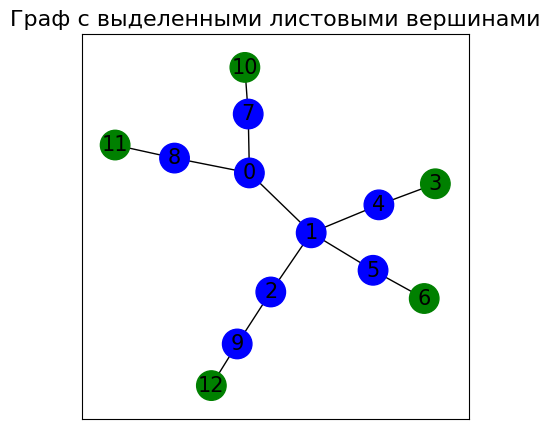

In [10]:
import random


def random_tree() -> nx.Graph:
    n = random.randint(10, 15)
    a = [0] * n
    for i in range(1, n):
        u = random.randint(0, i - 1)
        a[i] += 1
        a[u] += 1
    return generate_tree(a)


tree = random_tree()
# Находим листовые вершины
leaf_nodes = [node for node in tree.nodes if tree.degree[node] == 1]

# Настройка цветов узлов
node_colors = ['green' if node in leaf_nodes else 'blue' for node in tree.nodes]

# Рисуем граф
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(tree)
nx.draw_networkx(
    tree, pos, with_labels=True, node_color=node_colors, node_size=450, font_size=15
)
plt.title("Граф с выделенными листовыми вершинами", fontsize=16)
plt.show()


## №2. Готовим бревна ($2.5$ балла)
Теперь посаженное дерево нужно переработать на стройматериал для дома. Для этого дерево нужно распилить, причем так, чтобы его части не были слишком большими и тяжелыми. Самый оптимальный вариант — распилить его в центроиде.

*Центроидом* в дереве на $n$ вершинах называется такая его вершина, при удалении которой дерево распадается на деревья размером не более $\frac{n}{2}$. Напишите функцию `cut_down_tree`, которая принимает дерево `tree`, и возвращает список деревьев, на которые распадается `tree` при удалении какого-то из её центроидов. Обоснуйте корректность алгоритма.

In [11]:
def cut_down_tree(tree: nx.Graph) -> list[nx.Graph]:
    n = len(tree)
    sz = [0] * n

    def get_size(v, p = -1):
        sz[v] = 1
        for u in tree.neighbors(v):
            if u != p:
                get_size(u, v)
                sz[v] += sz[u]

    get_size(0)

    def find_centroid(v, p = -1):
        for u in tree.neighbors(v):
            if u != p and sz[u] > n // 2:
                return find_centroid(u, v)
        return v

    centroid = find_centroid(0)

    tree.remove_node(centroid)
    components = [tree.subgraph(c).copy() for c in nx.connected_components(tree)]
    return components


In [12]:
%%ipytest
import random


@pytest.mark.parametrize("seed", range(10))
def test_cut_down_tree(seed):
    random.seed(seed)
    tree = random_tree()
    assert all(len(t) <= len(tree) // 2 for t in cut_down_tree(tree.copy()))

..........                                                                                   [100%]
10 passed in 0.06s


*Обоснование корректности алгоритма*:

Алгоритм заключается в следующем:
- Посчитать размеры всех поддеревьев от корня
- Запустится от корня, если существует вершина, размер поддерева которой > $\dfrac{n}{2}$, то запуститься от нее, иначе вернуть текущую вершину

### Почему это работает?

Назовем $v$ текущую вершину, а $u$, любую вершину смежную с ней(но не предок)

Очевидно, что если у $\exists u$ : sz[$u$] > $\frac{n}{2}$, то $v$ - это точно не центроид.

Пусть тогда на каком-то этапе алгоритма оказалось $\forall$ $u$ верно, что sz[$u$] $\leq$ $\frac{n}{2}$, докажем, что это центроид:
- Так как размеры поддеревьев всех сыновей и так $\leq \frac{n}{2}$, осталось проверить лишь размер поддерева предка, получим $n - sz[v] \leq n - (\frac{n}{2} + 1) = n - \frac{n}{2} - 1 = \frac{n}{2} - 1$(первое неравенство выполняется так как мы пришли в вершину $v$, из какой-то, а значит ее размер был > $\frac{n}{2}$, а для корня эта проверка вообще не нужна, так как у него нет предка) то есть $v$ и правда центроид. **Корректность доказана**.

Визуализируйте результат работы функции: постройте изображение исходного дерева, в котором выделите найденный центроид, и изображение полученного леса. Используя `layout`, сделайте так, чтобы соответствующие вершины на картинках "до" и "после" были на одинаковых местах. На картинке "после" раскрастьте вершины каждого из получившихся деревьев в свой цвет.

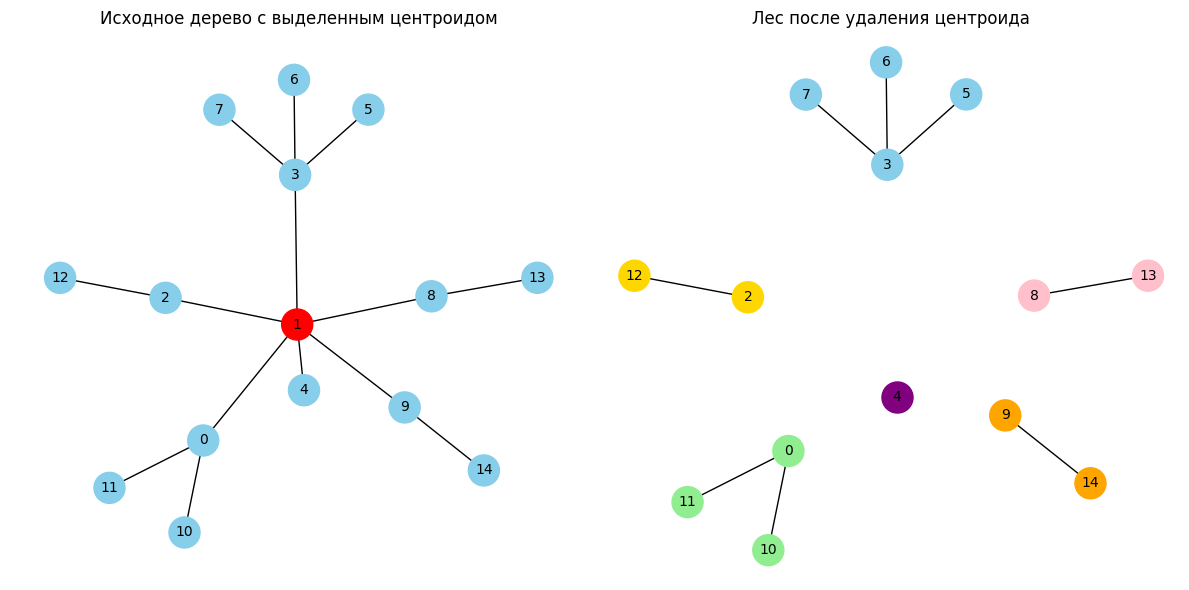

In [ ]:
tree = random_tree()
subtrees = cut_down_tree(tree.copy())

used = [0] * len(tree)
for trees in subtrees:
    for v in trees:
        used[v] = 1

centroid = next((node for node in tree if used[node] == 0), None)

# seed для совпадения расположения вершин
layout = nx.spring_layout(tree, seed=52)

# До
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(tree, pos=layout, with_labels=True, node_color=['red' if node == centroid else 'skyblue' for node in tree.nodes], edge_color='black', node_size=500, font_size=10)
plt.title("Исходное дерево с выделенным центроидом")

# После
plt.subplot(1, 2, 2)
colors = [
    'skyblue', 'lightgreen', 'gold', 'pink', 'orange', 'purple', 'cyan',
    'red', 'blue', 'lime', 'magenta', 'teal', 'brown', 'yellow', 'olive',
    'darkred', 'lightpink', 'darkblue', 'darkgreen', 'khaki', 'navy',
    'coral', 'turquoise', 'seagreen', 'plum', 'orchid', 'beige', 'tan',
    'lavender', 'indigo', 'aqua', 'maroon', 'salmon', 'chartreuse'
]

for idx, subtree in enumerate(subtrees):
    nx.draw(subtree, pos=layout, with_labels=True, node_color=[colors[idx % len(colors)] for _ in subtree.nodes], edge_color='black', node_size=500, font_size=10)
plt.title("Лес после удаления центроида")
plt.tight_layout()
plt.show()

## №3. Путешествие ($2.5 + 1$ баллов)
Итак, вы посадили дерево. Однако растет оно долго, и в свободное от ухода за ним (и, конечно же, учебы) время вы решили отправится в путешествие.

Ваше путешествие зключается в том, чтобы обойти все ребра некоторого графа. Времени у вас, однако, не слишком много, и проходить по ребрам по несколько раз вы не хотите. Напомним, что путь в графе, который проходит по всем ребрам по одному разу, называется *эйлеровым*, а сам граф называется *полуэйлеровым*, если в нем есть эйлеров путь.

*Задание*: напишите функцию `generate_semieuler`, которая возвращает какой-нибудь ориентированный полуэйлеров граф на $n$ вершинах с $m$ ребрами, у которого нет петель и двунаправленных ребер, либо `None`, если такого графа не существует. Обоснуйте корректность алгоритма.

In [ ]:
def generate_semieuler(n: int, m: int) -> nx.DiGraph | None:
    if (n % 2 == 1 and m > n * (n // 2)) or (n % 2 == 0 and m > n * ((n - 1) // 2) + 1):  # Проверка существования графа
        return None

    # Инициализация
    G = nx.DiGraph()
    G.add_nodes_from(range(n))

    v = 0
    cur_jump = 1
    can_start = gcd(n, cur_jump)
    first_vertex = v

    while m > 0:
        G.add_edge(v, (v + cur_jump) % n)
        v = (v + cur_jump) % n
        if (v == first_vertex):
            if v + 1 == can_start:
                cur_jump += 1
                can_start = gcd(n, cur_jump)
                first_vertex = 0
            else:
                first_vertex += 1
            v = first_vertex
        m -= 1

    return G

In [ ]:
%%ipytest

@pytest.mark.parametrize(
    "n, m",
    ((n, m) for n in range(0, 10) for m in range((n - 1) * (n - 2) // 2))
)
def test_generate_semieuler(n: int, m: int):
    graph = generate_semieuler(n, m)
    assert graph is not None
    assert graph.number_of_nodes() == n
    assert graph.size() == m
    graph.remove_nodes_from(list(nx.isolates(graph)))
    assert not graph or nx.has_eulerian_path(graph)
    assert all((v, u) not in graph.edges for u, v in graph.edges), \
        "в графе не должно быть двунаправленных ребер и петель"


def test_generate_semieuler_edge_cases():
    test_generate_semieuler(7, 21)
    assert generate_semieuler(7, 22) is None
    test_generate_semieuler(6, 13)
    assert generate_semieuler(6, 14) is None

......................................................................................       [100%]
86 passed in 0.69s


*Обоснование корректности алгоритма*:

Для начала докажем, что не существует полуйлерова графа с $n$ вершинами и $m$ ребрами, если:
$$\begin{cases}
    m > n * \lfloor\frac{n - 1}{2}\rfloor + 1   & \quad \text{if } n \text{ is even}\\
    m > n * \lfloor\frac{n}{2}\rfloor & \quad \text{if } n \text{ is odd}
  \end{cases}$$

1) **Нечетный** случай: Заметим, что $n * \lfloor\frac{n}{2}\rfloor$, это число ребер в полном графе, тогда очевидно, что добавления любого ребра приведет к двунаправленности, либо к петле.
2) **Четный** случай: Пусть мы провели $n * \lfloor\frac{n - 1}{2}\rfloor + 1$, ребер и при этом граф полуэйлеров, тогда по критерию существования эйлерова пути получим, что у каждой вершины ровно $\lfloor\frac{n - 1}{2}\rfloor$ входящих и выходящих ребер, кроме 2: у одной на 1 входящих больше, а у другой на 1 выходящее больше(так как кол-во ребер нечетно). Заметим, что проведя любое непроведенное ребро, мы только увеличим кол-во вершин, у которых степени полузахода и полуисхода не совпадут, при этом никакое новое ребро от начальной или конечной провести уже нельзя(так как у них $\lfloor\frac{n - 1}{2}\rfloor + \lfloor\frac{n - 1}{2}\rfloor + 1 = n - 1$, то есть сумма степени полузахода и полуисхода = максимальной возможной)

Идея заключается в следующем:
- Проверим критерий существования
- Будем двигаться по кругу, добавляя ребра с изначальным шагом 1(то есть соединяя вершины $v$ и $v + 1$), после - 2, 3, ..., и т.д. до тех пор пока не закончатся ребра, заметим, что на каждом шаге будет добавляться ровно n ребер

Докажем, что в графе, построенным таким образом точно будет эйлеров путь
- По критерию существования эйлеров путь существует если в граф частично связен(не считая изолированных вершин), если убрать ориентированность ребер, а также $\forall v$ $\in$ $G$ $d_+(v) = d_-(v)$, кроме возможно 2 у которых $d_+(v) = d_-(v) + 1$ и $d_-(v) = d_+(v) + 1$.
- Если мы прервемся на цикле с шагом 1, очевидно, что граф будет частично связен, если же будет такой цикл, то существует путь проходящий по всем вершинам(если убрать ориентированность), то есть граф уже не будет содержать изолированных вершин.
- Заметим, что каждый раз мы добавляем цикл, то степени + и - у всех вершин остаются равны, если же мы завершились, не закончив очередной цикл, получим, что у первой вершины в этом недостроенном цикле $d_+(v) = d_-(v) + 1$, а у последней $d_-(u) = d_+(v) + 1$, у остальных же будут равны, таким образом эйлеров путь точно существует.

**Коректность доказана**

Визуализируйте полученный граф и эйлеров путь в нем: отметьте концы пути и раскрасьте ребра таким образом, чтобы цвет плавно менялся вдоль пути.

*Дополнительный балл*: за красивую (по мнению проверяющего) визуализацию можно получить дополнительный балл.

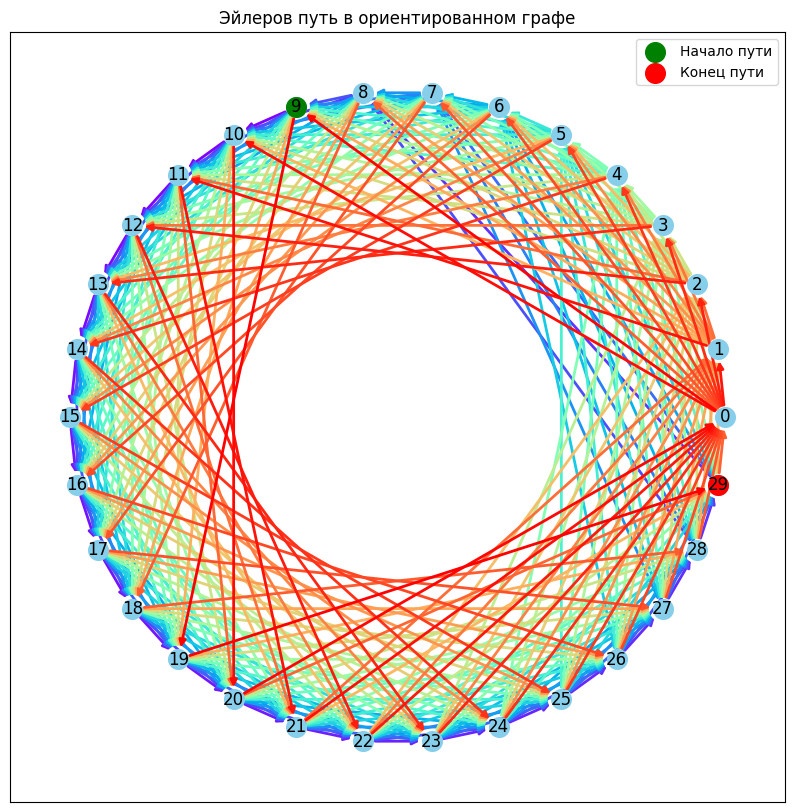

In [ ]:
G = generate_semieuler(30, 30 * 10 - 1)
#G = generate_semieuler(7, 15) # можете поменять чиселки, чтобы было красиво
eulerian_path = list(nx.eulerian_path(G))

pos = nx.circular_layout(G)

num_edges = len(eulerian_path)
colors = plt.cm.rainbow(np.linspace(0, 1, num_edges))

plt.figure(figsize=(10, 10))

# Отображение рёбер с градиентным цветом
for i, (u, v) in enumerate(eulerian_path):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=[colors[i]], width=2)

# Визуализация узлов
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=200)

# Визуализация меток узлов
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Отметка концов пути
start, end = eulerian_path[0][0], eulerian_path[-1][1]
nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color='green', node_size=200, label="Начало пути")
nx.draw_networkx_nodes(G, pos, nodelist=[end], node_color='red', node_size=200, label="Конец пути")

# Добавление легенды
plt.legend(scatterpoints=1, loc='best')
plt.title("Эйлеров путь в ориентированном графе")
plt.show()


## №4. Нужно больше красок! ($2.5 + 1$ баллов)
Вернувшись из путешествия, вы решили заняться строительством и покраской дома.

Так уж вышло, что ваш дом — это простой граф, где комнаты — это вершины. Чтобы дом не казался скучным, вы решили покрасить его так, чтобы у смежных вершин цвета были разными. Однако слишком много цветов вы тоже не хотите: все-таки краску покупать дешевле оптом. Поэтому раскраска должна быть минимальной.

Для проектирования дома вы наняли архитектора Мычельского. Изначально вы хотели сделать ваш дом в форме посаженного ранее дерева, однако г-н Мычельский указал на то, что тогда для покраски комнат хватит всего двух цветов, и предложил взять мычельскиан вашего дерева, причем в несколько итераций: т.е. взять мычельскиан мычельскиана ... мычельскиана вашего дерева. Вы согласились, и теперь вам придется придумать, как покрасить комнаты.

*Задание*: напишите функцию `mycielskian_coloring`, которая принимает на вход дерево `tree` c вершинами `0`, `1`, ..., `len(tree.nodes) - 1` и количество итераций `iterations`, и возвращает граф, получаемый взятием мычельскиана от `tree` `iterations` раз, в каждой вершине которого храниться целочисленный аттрибут `color`, задающий минимальную правильную раскраску на полученном графе.

In [ ]:
def mycielskian_coloring(tree: nx.Graph, iterations: int) -> nx.Graph:
    set_colors = [
    'skyblue', 'lightgreen', 'gold', 'pink', 'orange', 'purple', 'cyan',
    'red', 'blue', 'lime', 'magenta', 'teal', 'brown', 'yellow', 'olive',
    'darkred', 'lightpink', 'darkblue', 'darkgreen', 'khaki', 'navy',
    'coral', 'turquoise', 'seagreen', 'plum', 'orchid', 'beige', 'tan',
    'lavender', 'indigo', 'aqua', 'maroon', 'salmon', 'chartreuse'
    ]

    # Возьмем жадную расскраску, так как граф дерево то это точно 2 цвета
    colors = nx.coloring.greedy_color(tree, strategy="connected_sequential_bfs")

    G = tree

    for i in range(iterations):
        MG = G.copy()
        n = MG.number_of_nodes()
        # построим мыцельскиан графа
        MG.add_nodes_from(range(n, 2 * n + 1))
        for v, u in G.edges:
            MG.add_edge(v, n + u)
            MG.add_edge(u, n + v)
        MG.add_edges_from((2 * n, u) for u in range(n, 2 * n))

        # мы знаем, что x(MG) = x(G) + 1
        for u in range(n, 2 * n):
            colors[u] = colors[u - n]
        colors[2 * n] = max(colors.values()) + 1
        G = MG

    for v in G.nodes:
        G.nodes[v]["color"] = set_colors[colors[v]]

    return G

Graph with 15 nodes and 25 edges
G.nodes = NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))
G.edges = EdgeView([(0, 1), (0, 8), (1, 2), (1, 7), (1, 9), (2, 3), (2, 8), (2, 10), (3, 4), (3, 9), (3, 11), (4, 5), (4, 10), (4, 12), (5, 6), (5, 11), (5, 13), (6, 12), (7, 14), (8, 14), (9, 14), (10, 14), (11, 14), (12, 14), (13, 14)])


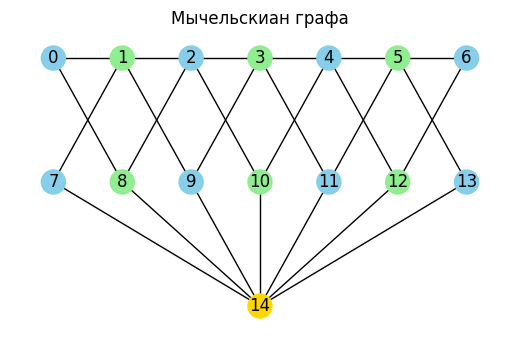

In [ ]:
G = mycielskian_coloring(nx.path_graph(7), iters := 1)
print(G)
print(f"{G.nodes = }")
print(f"{G.edges = }")
n = G.number_of_nodes() // 2
layout = nx.multipartite_layout(G, {"a" : [2*n],
                                    "b" : [i for i in range(n, 2*n)],
                                    "c": [i for i in range(0, n)]}, "horizontal")

node_colors = [G.nodes[node]["color"] for node in G.nodes]

# Рисование графа
plt.figure(figsize=(5, 3))
nx.draw(G, with_labels=True, node_color=node_colors, pos=layout)
plt.title("Мычельскиан графа")
plt.show()

In [ ]:
G = mycielskian_coloring(random_tree(), iters := 5)
assert all(G.nodes[v]['color'] != G.nodes[u]['color'] for u, v in G.edges)

Используя написанную функцию, визуализируйте полученый граф `G` и его минимальную правильную раскраску.

*Дополнительный балл*: за красивую (по мнению проверяющего) визуализацию можно получить дополнительный балл.

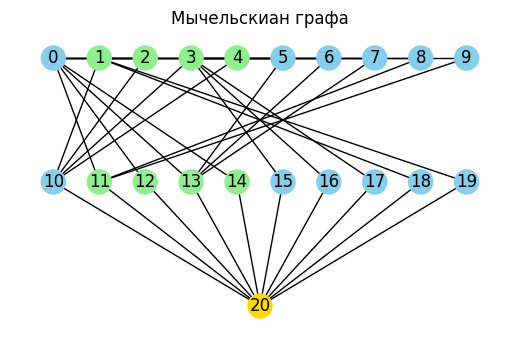

In [ ]:
G = mycielskian_coloring(random_tree(), iters := 1)

n = G.number_of_nodes() // 2
layout = nx.multipartite_layout(G, {"a" : [2*n],
                                    "b" : [i for i in range(n, 2*n)],
                                    "c": [i for i in range(0, n)]}, "horizontal")

node_colors = [G.nodes[node]["color"] for node in G.nodes]

# Рисование графа
plt.figure(figsize=(5, 3))
nx.draw(G, with_labels=True, node_color=node_colors, pos=layout)
plt.title("Мычельскиан графа")
plt.show()